In [7]:
!pip install ultralytics

In [8]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
import cv2
from ultralytics import YOLO
import numpy as np
import base64
import io
from PIL import Image

<IPython.core.display.Javascript object>

Saved to photo.jpg


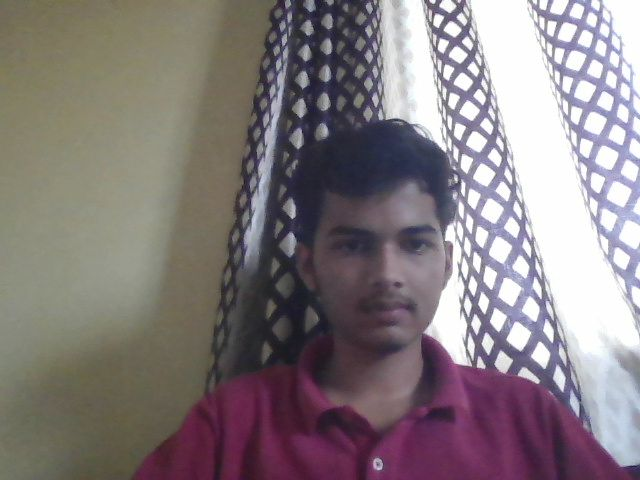

In [9]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
import cv2
import numpy as np
import base64
import io
from PIL import Image

# JavaScript function to capture photo
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize output to fit screen
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for button press
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = base64.b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Capture photo
filename = take_photo()
print("Saved to", filename)

# Convert to OpenCV
img = cv2.imread(filename)
cv2_imshow(img)



image 1/1 /content/photo.jpg: 480x640 1 person, 1 tie, 474.0ms
Speed: 3.7ms preprocess, 474.0ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/runs/detect/predict2


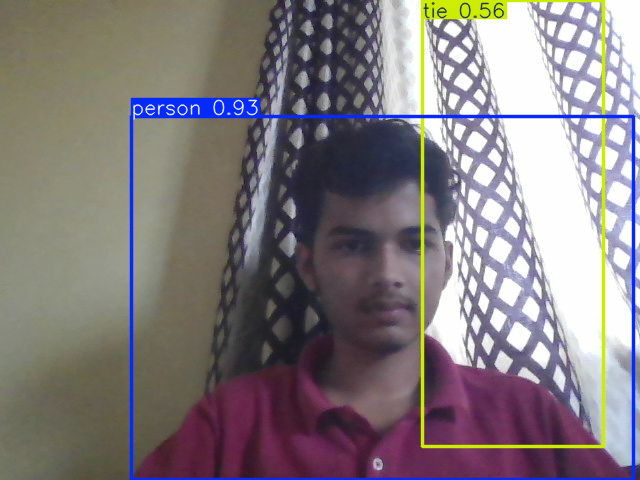

In [10]:
from ultralytics import YOLO

yolo = YOLO("yolov8s.pt")

results = yolo.predict(filename, conf=0.4, save=True)
results[0].show()
